# FINAL PROJECT - Data Analysis
---
---

**<font size="5">Members and contribution</font>**

|ID's Student|Fullname|Contribute rate (%)|Tasks|
|---------------|---------|---------------------|---------|
|20127028|Võ Văn Hoàng        |100%|Exploratory Data Analysis|
|20127054|Ngô Văn Trung Nguyên|100%|Exploratory Data Analysis|


***The dataset was downloaded by us on the website of Kaggle which is an open source and free for everyone to access and download:***
***https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries/discussion?select=Levels_Fyi_Salary_Data.csv***

---

**<font size="5">Collect Data</font>**

- This dataset contains useful information such as education level, compensation (base salary, bonus, stock grants), race, and more.
- It consists of 62,000 salary records from top companies. 
- This data was scraped off levels.fyi and then the author cleaned it up a tad.
- It is Public Domain which is in the state of belonging or being available to the public as a whole, and therefore not subject to copyright.

---

**<font size="5">Explore Data</font>**

### Environment

In [1]:
import sys
sys.executable

'c:\\Users\\42nvt\\miniconda3\\envs\\min_ds-env\\python.exe'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime
import statistics
import seaborn as sns
from matplotlib import cycler

### Data Analysis Checklist:
- Check the data type whether it is matched with each attribute or not.
- Check the null values and the duplicate values.
- Check the outlier values.
- Check univariate and multivariate correlations.

### Questions about data set:
- Did you clearly understand the attributes in your data sets?
- Have you considered whether the question can be answered with the available data?

### Data preprocessing:
#### Read data from file:

In [3]:
salary_df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
rows, cols = salary_df.shape
print('Number of Rows: ', rows)
print('Number of Columns: ', cols)
salary_df.head()

Number of Rows:  62642
Number of Columns:  29


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


# Content of each column

In [4]:
salary_df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

# Definition of each column:

|Order|Name of column|Meaning|
|-----|--------------|-------|
|1|timestamp|Date and time that information was recorded|
|2|company|Name of woring company|
|3|level|Level in working job|
|4|title|Job position|
|5|totalyearlycompensation|The final salary received each year($)|
|6|location|Working place|
|7|yearsofexperience|Number of experience years|
|8|yearsatcompany|Number of years working for that company|
|9|tag|Type of work|
|10|basesalary|The raw salary|
|11|stockgrantvalue|Rewarded value by stock|
|12|bonus|Rewarded money|
|13|gender|Male or female|
|14|otherdetails|More description about the job|
|15|cityid|ID of the city|
|16|dmaid|Designated Market Area ID|
|17|rowNumber|Number of rows|
|18|Masters_Degree|Have Master Degree or not|
|19|Bachelors_Degree|Have Bachelors Degree or not|
|20|Doctorate_Degree|Have Doctorate Degree or not|
|21|Highschool|Graduated High School or not|
|22|Some_College|Studied in any college or not|
|23|Race_Asian|Asian|
|24|Race_White|Citizens who have white race|
|25|Race_Two_Or_More|Have 2 or more races|
|26|Race_Black|Citizens who have black race|
|27|Race_Hispanic|American with the root of Latinos or Spanish|
|28|Race|Nation ethnic|
|29|Education|Level of education|




# Does the data have duplicated rows?

In [5]:
salary_dup = salary_df.duplicated().sum()
print('Number of Duplicated rows: ', salary_dup)

Number of Duplicated rows:  0


As we can see that no row is duplicated, let's find our another things

# Is there any redundant or unnecessary column data?


As we can see, 'level', 'cityid', 'dmaid', 'rowNumber', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic' are redudant through our analyse, because:
- **'level'** has various different value because each company has their own definition of **'level'**, so that we only need to keep the **'title'** column and delete the 'level' column. 
- **'cityid', 'dmaid'** column is not too relevent to our project, because we do not find out information about places, we concentrate much on SALARY.
- **'rowNumber'** column just tells us the order of each row, it is not neccessary for us.
- **'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'** is general included in **'Race'** column, so it is quite redundant.

## Therefore, we are going to delete those redundant and unnecessary columns:

In [6]:
drop_cols = ["level", "cityid", "dmaid", 'rowNumber', "Race_Asian", "Race_White", "Race_Two_Or_More", "Race_Black", "Race_Hispanic" ]
salary_df.drop(drop_cols, axis=1, inplace=True)
salary_df.head()

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
0,6/7/2017 11:33:27,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN


**Let's check again the data:**

In [7]:
rows, cols = salary_df.shape
print('Number of Rows: ', rows)
print('Number of Columns: ', cols)
salary_df.head()

Number of Rows:  62642
Number of Columns:  20


,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
0,6/7/2017 11:33:27,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN


Ok, it is better than before, let's explore more!!!

---

# Initial Datatypes of Salary DataFrames

In [8]:
salary_df.dtypes

timestamp                   object
company                     object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race                        object
Education                   object
dtype: object

- *timestamp changes from object to datetime*
- *All the object type change to string*

---

# Preprocessing

**1. timestamp changes from object to datetime**

In [9]:
# date changes from object to datetime
salary_df['timestamp'] = pd.to_datetime(salary_df['timestamp'], infer_datetime_format = True)

**2. company, title, location, tag, gender, otherdetails, Race, Education change from object to string**

In [10]:
# company, title, location, tag, gender, otherdetails, Race, Education change from object to string
salary_df['company'] = salary_df['company'].astype('string')
salary_df['title'] = salary_df['title'].astype('string')
salary_df['location'] = salary_df['location'].astype('string')
salary_df['tag'] = salary_df['tag'].astype('string')
salary_df['gender'] = salary_df['gender'].astype('string')
salary_df['otherdetails'] = salary_df['otherdetails'].astype('string')
salary_df['Race'] = salary_df['Race'].astype('string')
salary_df['Education'] = salary_df['Education'].astype('string')


In [11]:
salary_df.dtypes

timestamp                  datetime64[ns]
company                            string
title                              string
totalyearlycompensation             int64
location                           string
yearsofexperience                 float64
yearsatcompany                    float64
tag                                string
basesalary                        float64
stockgrantvalue                   float64
bonus                             float64
gender                             string
otherdetails                       string
Masters_Degree                      int64
Bachelors_Degree                    int64
Doctorate_Degree                    int64
Highschool                          int64
Some_College                        int64
Race                               string
Education                          string
dtype: object

Before finding out something new, we should seperate the column in 2 types: numerical and categorical

**Numerical column:**
- timestamp
- totalyearlycompensation
- yearsofexperience
- yearsatcompany
- basesalary
- stockgrantvalue
- bonus

**Categorical column:**
- company
- title
- location
- tag 
- gender
- otherdetails
- Masters_Degree
- Bachelors_Degree
- Doctorate_Degree
- Highschool
- Some_College
- Race
- Education

Now we already preprocessed Data

---

# Missing Data

In [12]:
salary_df.isnull().sum()

timestamp                      0
company                        5
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race                       40215
Education                  32272
dtype: int64

We have observed and decided that there are a little bit of data with NONE value.  
There are just only total 8 times did not have the score, 12 times did not have the name of scorer and 96 times did not have the time of a match.  


Hmm...Insert some colour for good vision

In [13]:
colors = cycler('color', ['#00CED1', '#2F4F4F', '#9988DD', '#F4A460', '#BC8F8F', '#DA70D6']) 
plt.rc('axes', facecolor='#D8BFD8', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors) 
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='black') 
plt.rc('ytick', direction='out', color='black') 
plt.rc('patch', edgecolor='#D8BFD8') 

---

# Outliers Removal

In [14]:
# totalyearlycompensation check
salary_df['totalyearlycompensation'].describe()

count    6.264200e+04
mean     2.163004e+05
std      1.380337e+05
min      1.000000e+04
25%      1.350000e+05
50%      1.880000e+05
75%      2.640000e+05
max      4.980000e+06
Name: totalyearlycompensation, dtype: float64

In [15]:
# yearsofexperience check
salary_df['yearsofexperience'].describe()

count    62642.000000
mean         7.204135
std          5.840375
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         69.000000
Name: yearsofexperience, dtype: float64

In [16]:
# yearsatcompany check
salary_df['yearsatcompany'].describe()

count    62642.000000
mean         2.702093
std          3.263656
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         69.000000
Name: yearsatcompany, dtype: float64

In [17]:
# basesalary check
salary_df['basesalary'].describe()

count    6.264200e+04
mean     1.366873e+05
std      6.136928e+04
min      0.000000e+00
25%      1.080000e+05
50%      1.400000e+05
75%      1.700000e+05
max      1.659870e+06
Name: basesalary, dtype: float64

In [18]:
# stockgrantvalue check
salary_df['stockgrantvalue'].describe()

count    6.264200e+04
mean     5.148608e+04
std      8.187457e+04
min      0.000000e+00
25%      0.000000e+00
50%      2.500000e+04
75%      6.500000e+04
max      2.800000e+06
Name: stockgrantvalue, dtype: float64

In [19]:
# bonus check
salary_df['bonus'].describe()

count      62642.000000
mean       19334.746588
std        26781.292040
min            0.000000
25%         1000.000000
50%        14000.000000
75%        26000.000000
max      1000000.000000
Name: bonus, dtype: float64

Check gender

In [20]:
salary_df['gender'].unique()

<StringArray>
[<NA>, 'Male', 'Female', 'Other', 'Title: Senior Software Engineer']
Length: 5, dtype: string

In [21]:
salary_df.shape[0]

62642

In [22]:
salary_df['gender'] = salary_df['gender'].replace(to_replace=["Other", "Title: Senior Software Engineer"], value= np.nan)
salary_df['gender'].unique()

array([<NA>, 'Male', 'Female', nan], dtype=object)

In [23]:
salary_df['gender'] = salary_df['gender'].fillna(method='backfill')

In [24]:
salary_df['gender'].isna().sum()

0

Male      83.827145
Female    16.172855
Name: gender, dtype: float64

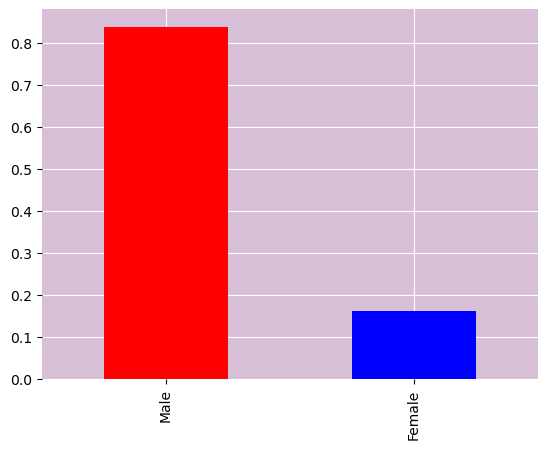

In [25]:
# check gender
salary_df.gender.value_counts(normalize=True).plot(kind="bar", color=["red", "blue", "yellow"])
salary_df['gender'].value_counts(normalize=True) * 100

Master's Degree      50.678301
Bachelor's Degree    41.491604
PhD                   5.607507
Some College          1.168917
Highschool            1.053671
Name: Education, dtype: Float64

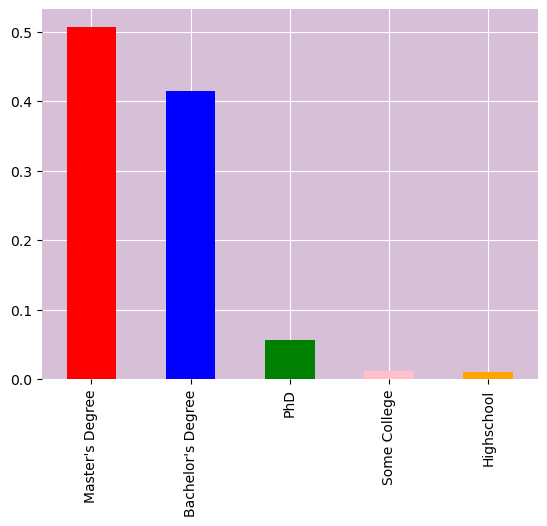

In [26]:
# check education
salary_df.Education.value_counts(normalize=True).plot(kind="bar", color=["red", "blue", "green", "pink", "orange"])
salary_df['Education'].value_counts(normalize=True) * 100

As you can see, Column Education where has Highshool, Some College only occupy about 1% so that we can change it to nan.

In [27]:
salary_df['Education'] = salary_df['Education'].replace(to_replace=["Highschool", "Some College"], value= np.nan)
salary_df['Education'].unique()

array([<NA>, 'PhD', "Master's Degree", "Bachelor's Degree", nan],
      dtype=object)

In [28]:
salary_df.shape[0]

62642

Master's Degree      51.830274
Bachelor's Degree    42.434753
PhD                   5.734972
Name: Education, dtype: float64

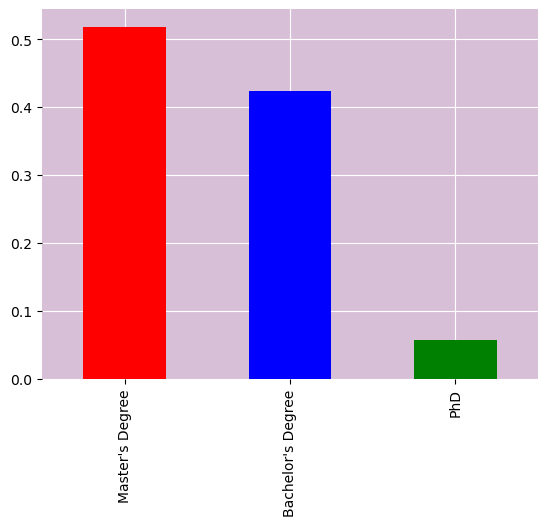

In [29]:
salary_df.Education.value_counts(normalize=True).plot(kind="bar", color=["red", "blue", "green"])
salary_df['Education'].value_counts(normalize=True) * 100

---

# Questioning

---

**1. Whether people who have PhD received higher salary than whom do not have in every position?**

*My team think that it is a practical question because it is a good sourse for someone before deciding whether they ought to study further education or not. Evenly, people who have PhD already can know that whether their salary at that time is suitable or not.*






## Answer:

For this question, we decide to access this content in 4 aspects:
- **Step 1:** Find out the rate of work with their degree, visualize it clearly?
- **Step 2:** For each type of degree, how about the income of each type for a year?
- **Step 3:** For each position, how is the distribution of PhD?
- **Step 4:** With top 5 position have the most PhD, how about their salary?

 ### Before exploring more exciting things, we should go back again the Preprocessing step:

In [30]:
# Column education is used for analysing, so that empty value or NaN of this column will be saved in df_nonvalue in case using:
df_nonvalue = salary_df[salary_df['Education'].notna()]
df_nonvalue.shape[0]

29695

Moreover, Column Education where has Highshool only occupy about 1% so that we can delete it to deny noise

### Everything is already now, let's go to Step 1!!!

***Step 1: Find out the rate of work with their degree, visualize it clearly?***

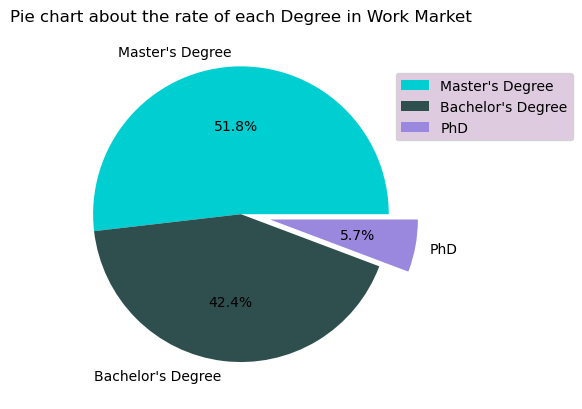

In [55]:
# Percentage of each degree in work market:
salary_df.Education.value_counts(normalize=True).plot(kind="pie", startangle=0, explode=[0, 0, 0.2], autopct='%1.1f%%')
salary_df['Education'].value_counts(normalize=True) * 100

plt.ylabel('')
plt.legend(bbox_to_anchor =(0.9, 0.9))
plt.title('Pie chart about the rate of each Degree in Work Market');

- #### Suprisingly, Job for people had PhD only occupied a light rate in work market, maybe who have PhD have more interest in research at universities, institution, academy,...


***Step 2: For each type of degree, how about the income of each type for a year?***

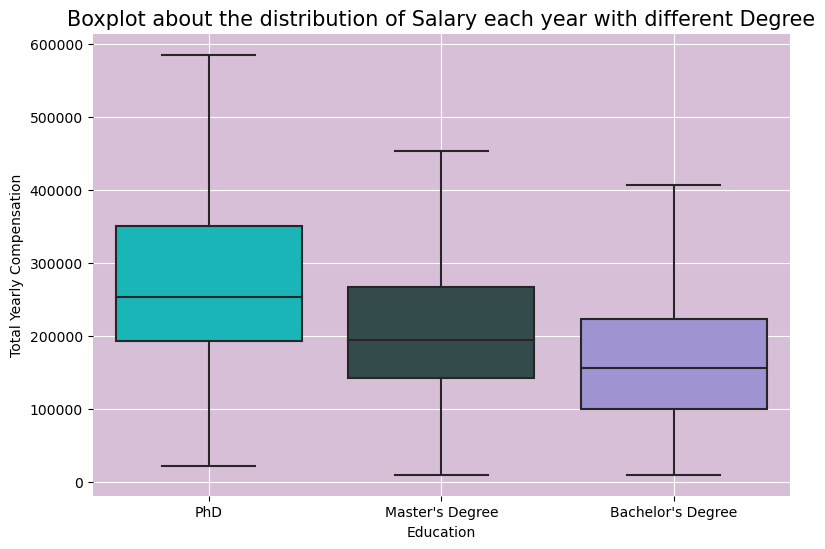

In [32]:
plt.figure(figsize=(9, 6))
sns.boxplot(data = salary_df, x='Education', y='totalyearlycompensation', showfliers=False)
plt.xlabel('Education')
plt.ylabel('Total Yearly Compensation')
plt.grid(True);
plt.title('Boxplot about the distribution of Salary each year with different Degree', fontsize=15);


- #### In general, although the number of people who have PhD is not many (known from step 1), the income they can receive is higher than people who have orther degree (despite a range of fluctuation).
- #### Hmm...good signal for who want to get a PhD.



***Step 3: For each position, how is the distribution of PhD?***

In [33]:
# Number of each type of degree in each position
df_2column = salary_df.groupby(['title', 'Education']).size()
df_2column = df_2column.unstack().fillna(0)
df_2column

Education,Bachelor's Degree,Master's Degree,PhD
title,,,
Business Analyst,276.0,237.0,5.0
Data Scientist,242.0,798.0,365.0
Hardware Engineer,222.0,840.0,217.0
Human Resources,89.0,99.0,7.0
Management Consultant,252.0,333.0,12.0
Marketing,226.0,182.0,4.0
Mechanical Engineer,159.0,130.0,27.0
Product Designer,386.0,342.0,20.0
Product Manager,669.0,1462.0,35.0


In [34]:
# Order the number of PhD for each position from high to low
df_order = df_2column.sort_values('PhD', ascending=False)
df_order = df_order[["PhD", "Master's Degree", "Bachelor's Degree"]]
df_order

Education,PhD,Master's Degree,Bachelor's Degree
title,,,
Software Engineer,887.0,9213.0,8661.0
Data Scientist,365.0,798.0,242.0
Hardware Engineer,217.0,840.0,222.0
Software Engineering Manager,81.0,862.0,533.0
Product Manager,35.0,1462.0,669.0
Mechanical Engineer,27.0,130.0,159.0
Technical Program Manager,27.0,472.0,312.0
Product Designer,20.0,342.0,386.0
Solution Architect,13.0,282.0,234.0


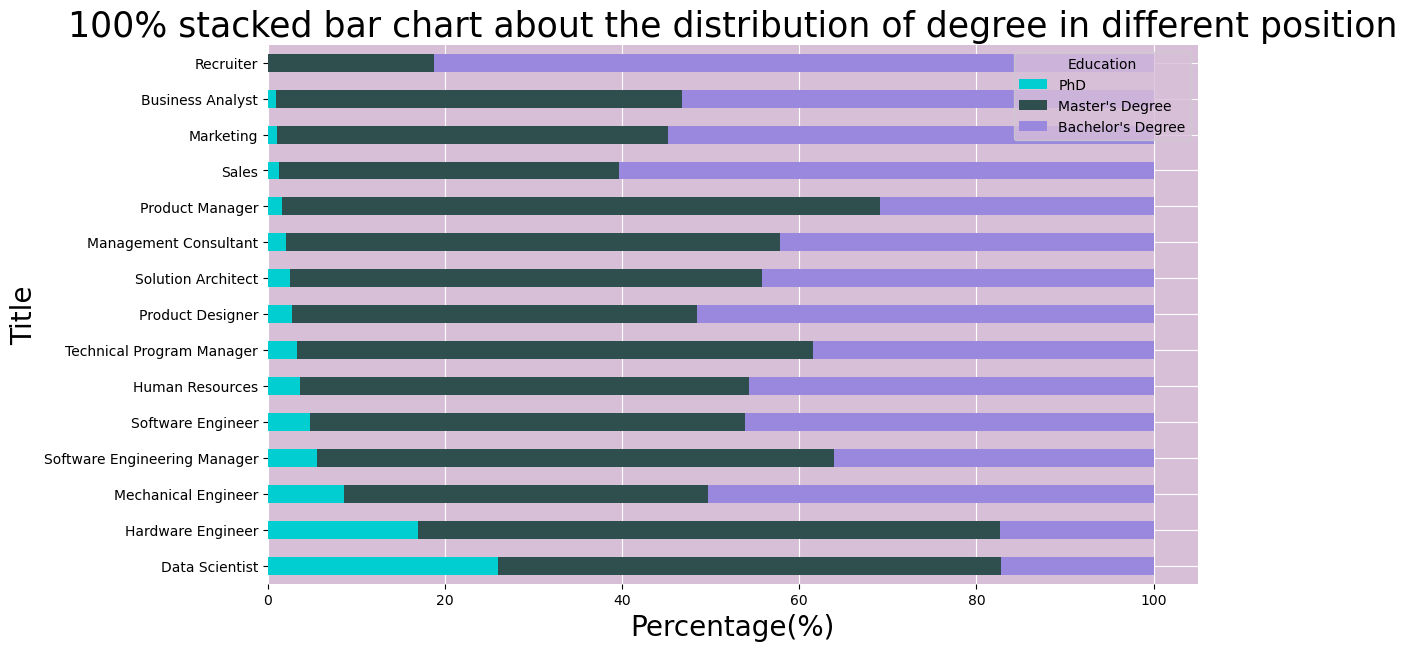

In [35]:
df_percentage = df_order.apply(lambda col: col*100/df_2column.sum(axis=1))
df_percentage = df_percentage.sort_values('PhD', ascending=False)
df_percentage.plot(kind='barh', stacked=True, figsize=(12, 7))
plt.xlabel('Percentage(%)', fontsize=20)
plt.ylabel('Title', fontsize=20)
plt.title('100% stacked bar chart about the distribution of degree in different position', fontsize=25);
plt.grid(True);

- #### It is clear that different position has diffrent percentage of PhD, to be more clear:
- #### Recruiter, Marketing, Sales has the lowest rate of PhD, it is easy to know that these positions have the ability to contact, communicate more than academic field.
- #### Of course, positions which require the researching things, such as Data Scientist, Hardware Engineer, Mechanical Engineer has the highest percentage of PhD (although Master's Degree is also high)

***Step 4: With top 5 position have the most PhD, how about their salary?***

In [36]:
# Select top 5
df_percentage = df_percentage.sort_values('PhD', ascending=False)
top_PhD = df_percentage.index[:5].values
top_PhD

array(['Data Scientist', 'Hardware Engineer', 'Mechanical Engineer',
       'Software Engineering Manager', 'Software Engineer'], dtype=object)

In [37]:
# Average
df_average = salary_df[salary_df.title.isin(top_PhD)]
df_average = df_average.groupby(['title', 'Education'])[['totalyearlycompensation']].mean()
df_average

totalyearlycompensation
title                        Education                                 
Data Scientist               Bachelor's Degree            155314.049587
                             Master's Degree              188525.062657
                             PhD                          253901.369863
Hardware Engineer            Bachelor's Degree            178400.900901
                             Master's Degree              202908.333333
                             PhD                          251599.078341
Mechanical Engineer          Bachelor's Degree            139616.352201
                             Master's Degree              167576.923077
                             PhD                          220666.666667
Software Engineer            Bachelor's Degree            169140.399492
                             Master's Degree              210244.545751
                             PhD                          306023.675310
Software Engineering Manager Bachelor's Degree            295733.583490
                             Master's Degree              357475.638051
                             PhD                          453617.283951

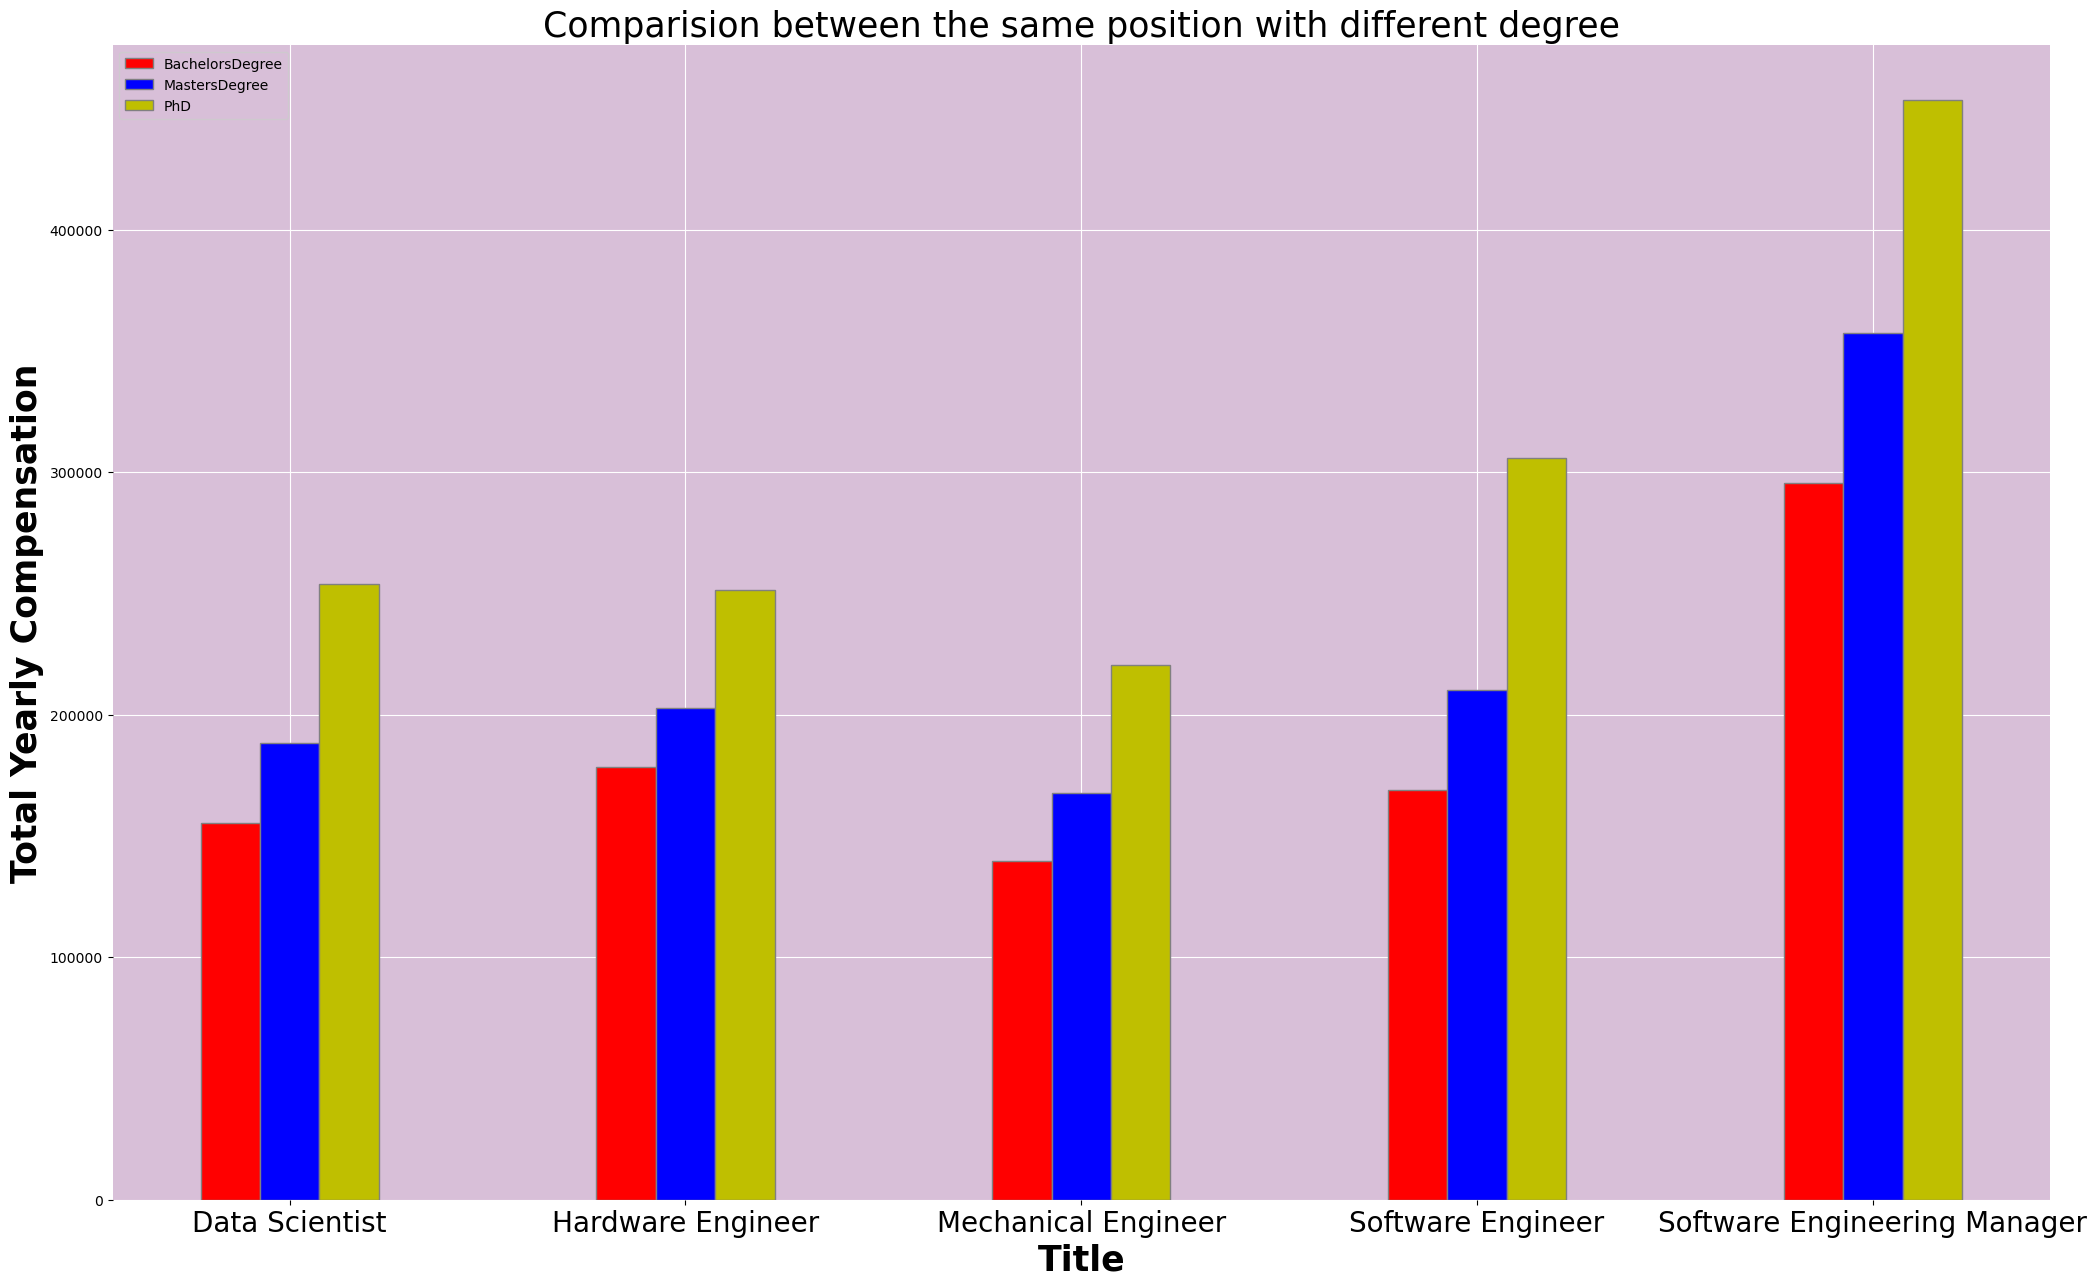

In [38]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(25, 15))
 
# set height of bar
BachelorsDegree = [155314, 178400, 139616, 169140, 295733]
MastersDegree = [188525, 202908, 167576, 210244, 357475]
PhD = [253901, 251599, 220666, 306023, 453617]
 
# Set position of bar on X axis
br1 = np.arange(len(BachelorsDegree))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, BachelorsDegree, color ='r', width = barWidth,
        edgecolor ='grey', label ='BachelorsDegree')
plt.bar(br2, MastersDegree, color ='b', width = barWidth,
        edgecolor ='grey', label ='MastersDegree')
plt.bar(br3, PhD, color ='y', width = barWidth,
        edgecolor ='grey', label ='PhD')

# Adding Xticks
plt.xlabel('Title', fontweight ='bold', fontsize = 25)
plt.ylabel('Total Yearly Compensation', fontweight ='bold', fontsize = 25)
plt.xticks([r + barWidth for r in range(len(BachelorsDegree))],
['Data Scientist', 'Hardware Engineer', 'Mechanical Engineer', 'Software Engineer', 'Software Engineering Manager'], fontsize = 20)
plt.title('Comparision between the same position with different degree', fontsize=25);
plt.legend()
plt.show()

- #### Obviously, top 5 positions have the most PhD, about the salary PhDs can earn always the highest salary compare to the orther, this can prove that it is really worthy to get a PhD.

### Sum up from this question
- The number of jobs for PhD is not too high (lower than Master and Bachelor) but in general the income for people who have a PhD is higher than the orther.
- The number of people who have a PhD only high in some academic position, such as: Data Scientist, Hardware Engineer, Mechanical Engineer and at these position, PhD proves themselves a lot, imcome of them is remarkably higher than the orther, so that in this situation acheving a PhD is a good choice.

## Questions: Top 10 companies based on the number of high-paying jobs, compare their total yearly compensation and does gender pay gap exist in these top 10 companies?

Salary is one of the highest expectations from job applicants to job recruiters. Each company will have their range of salary based on their business scale. Knowing top 10 companies based on the number of high-paying jobs, job applicants will have more options to consider

Thu nhập là một trong những lý do khi ứng viên tìm việc. Mỗi công ty đều có mức lương khác nhau dựa vào quy mô của họ. Trả lời được câu hỏi này sẽ giúp các ứng viên có thêm thông tin về top những công ty đứng đầu gồm công ty nào, các chỉ số về lương (mean, median, Q1, Q3, khoảng lương) và liệu có sự phân biệt giữa nam và nữ trong vấn đề về lương hay không

## Answer:

Để trả lời câu hỏi này, chúng ta làm theo các bước:
1. Chọn ra ngưỡng thu nhập cao, ở đây nhóm chọn Q3 là ngưỡng.
2. Chọn ra top 10 công ty có nhiều công việc sở hữu mức lương cao. Vẽ biểu đồ boxplot về lương của 10 công ty.
3. So sánh mức lương giữa nam và nữ của 10 công ty đó. Vẽ biểu đồ cột.

In [39]:
q3_salary = salary_df['totalyearlycompensation'].quantile(0.75)
print('Salary Q3: ', q3_salary)

Salary Q3:  264000.0


Tạo 1 df mới chỉ chứa các dòng có lương cao hơn hoặc bằng ngưỡng Salary Q3

In [40]:
high_salary_df = salary_df[salary_df['totalyearlycompensation'] >= q3_salary]

Tính ra top 10 công ty

In [41]:
top10_company = high_salary_df['company'].value_counts()[:10]

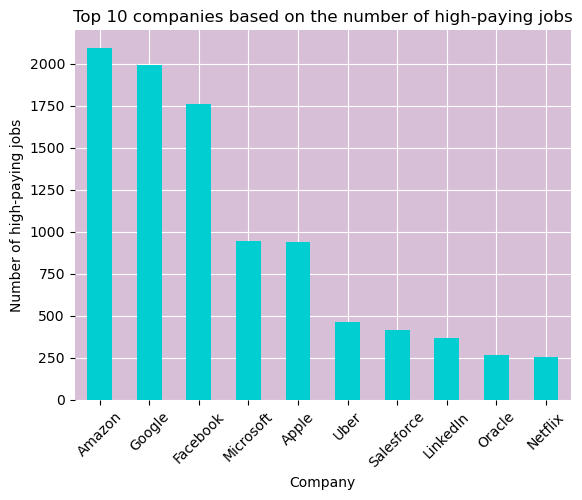

In [42]:
top10_company.plot.bar()
plt.title('Top 10 companies based on the number of high-paying jobs')
plt.xlabel('Company')
plt.ylabel('Number of high-paying jobs')
plt.xticks(rotation = 45) 
plt.show()

Không quá bất ngờ khi các tên tuổi lớn về công nghệ đều xuất hiện, điển hình là Big Five (Google, Amazon, Facebook, Apple, Microsoft).

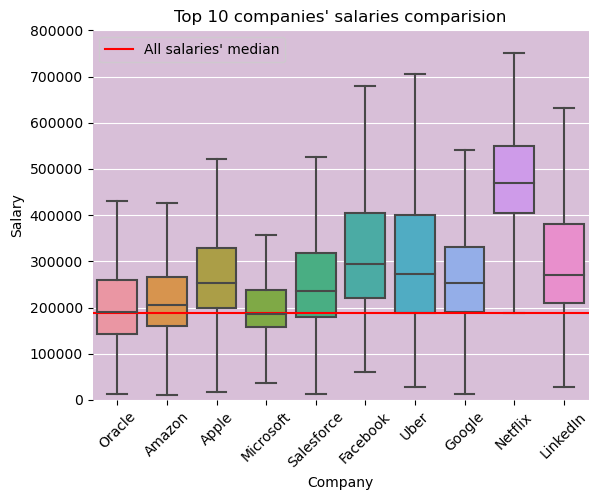

In [43]:
#plt.figure(figsize=(14,10))

df_company = salary_df[salary_df['company'].isin(top10_company.keys())]
fig = sns.boxplot(x='company', y='totalyearlycompensation', data=df_company, showfliers = False)
plt.title('Top 10 companies\' salaries comparision')
plt.xlabel('Company')
plt.ylabel('Salary')
plt.xticks(rotation = 45)

median_salary = salary_df['totalyearlycompensation'].median()
plt.axhline(y=median_salary, color='r', linestyle='-', label='All salaries\' median')
plt.legend()

fig.axis(ymin=0, ymax=800000);

plt.show()

Đa phần top 10 các công ty lớn sẽ có mức lương trung bình hàng năm rơi vào khoảng 200 000 - 300 000. Cao nhất trong các công ty trên là Netflix, với mức median cho lương hàng năm lên tới 500 000.

Kiểm tra các giá trị của gender

In [44]:
genderRatio = df_company.pivot_table(index='company', columns='gender', aggfunc='size')
sums = genderRatio[['Female', 'Male']].sum(axis=1)
genderRatio['FemaleRatio'] = genderRatio['Female'] / sums
genderRatio['MaleRatio'] = genderRatio['Male'] / sums
genderRatio[['MaleRatio', 'FemaleRatio']]

gender,MaleRatio,FemaleRatio
company,,
Amazon,0.852818,0.147182
Apple,0.844181,0.155819
Facebook,0.823077,0.176923
Google,0.843418,0.156582
LinkedIn,0.841655,0.158345
Microsoft,0.832439,0.167561
Netflix,0.798507,0.201493
Oracle,0.821809,0.178191
Salesforce,0.863636,0.136364


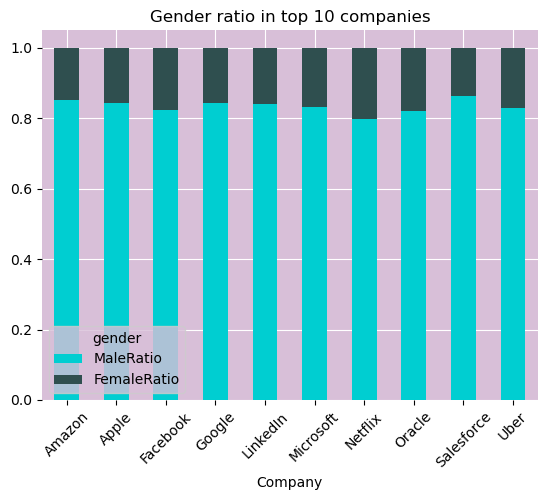

In [45]:
genderRatio[['MaleRatio', 'FemaleRatio']].plot(kind='bar', stacked = True, mark_right=True)

plt.title('Gender ratio in top 10 companies')
plt.xlabel('Company')
plt.xticks(rotation = 45)
plt.show()

In [46]:
male = df_company[df_company['gender'] == 'Male']
maleSalary_median = male.groupby('company')['totalyearlycompensation'].median()
maleSalary_median.name = 'Male'

female = df_company[df_company['gender'] == 'Female']
femaleSalary_median = female.groupby('company')['totalyearlycompensation'].median()
femaleSalary_median.name = 'Female'

genderSalary_median = pd.concat([maleSalary_median, femaleSalary_median],axis=1)
genderSalary_median

,Male,Female
company,,
Amazon,207000,200000
Apple,257000,233000
Facebook,299000,267000
Google,255000,240500
LinkedIn,275000,257000
Microsoft,190000,178000
Netflix,474000,432500
Oracle,195000,177000
Salesforce,238000,220000


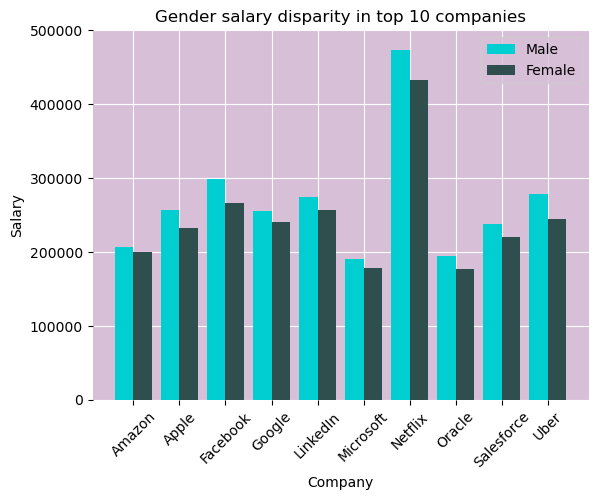

In [47]:
x = np.arange(10)
plt.bar(x - 0.2, maleSalary_median, 0.4, label='Male')
plt.bar(x + 0.2, femaleSalary_median, 0.4, label='Female')

plt.xticks(x, genderSalary_median.index, rotation= 45)    
plt.xlabel("Company")
plt.ylabel("Salary")
plt.title("Gender salary disparity in top 10 companies")
plt.axis(ymax = 500000)
plt.legend()
plt.show()

# Look back for this project

### Difficulties:
- Finding and selecting a good and suitable dataset took us a large amount of time.
- Thinking and write down a question is also a hard thing, sometimes, we have many useful question but our knowledge now is not good enough to solve it.
- Almost the dataset we found, the number of blank. NaN value is many.
- This dataset includes 29 columns, it is also a hard maths for us to handle all.

### Lessons can earn:
- It is a good chance for us to train our brain practicing the process how to solve a problem strp by step.
- Have a good grasp of visualizing the data for readers can understand by seeing charts,...
- Be patient and always think a trouble in different aspects.

### If we have more time:
- Try our best to apply some machine learning in the project
- Think more deeply about the noise, NaN value
- Try to explore more column in the dataset

# References:
- Link slides of Theory Teacher: https://drive.google.com/drive/folders/1WBgeLNoWVuWRaGrp2i6Z4tAEn8IpFqpq
- How to draw Multiple bar plots: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/ 
- Kaggle dataset: https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries/discussion?select=Levels_Fyi_Salary_Data.csv
- All knowledge on theory class of Teacher. Nghĩa
- Lab 01, Lab 02, Lab 03 of Instructor. Long

# THANK YOU TEACHERS FOR ALL THE SUPPORT FOR US.